# Exercise: Summary Functions

# Introduction

Run the following cell to load your data and some utility functions (including code to check your answers).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows", 5)

reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exercises

## 1.

What is the median of the `points` column in the `reviews` DataFrame?

In [2]:
median_points = reviews.points.median()
print(round(median_points,2))

88.0


## 2. 
What countries are represented in the dataset? (Your answer should not include any duplicates.)

In [3]:
countries = reviews.country.unique()
countries

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

## 3.
How often does each country appear in the dataset? Create a Series `reviews_per_country` mapping countries to the count of reviews of wines from that country.

In [4]:
import seaborn as sns
reviews_per_country = reviews.country.value_counts()
reviews_per_country

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

## 4.
Create variable `centered_price` containing a version of the `price` column with the mean price subtracted.

(Note: this 'centering' transformation is a common preprocessing step before applying various machine learning algorithms.) 

In [5]:
centered_price = reviews.price - reviews.price.mean()
print(round(centered_price, 2))

0           NaN
1        -20.36
2        -21.36
3        -22.36
4         29.64
          ...  
129966    -7.36
129967    39.64
129968    -5.36
129969    -3.36
129970   -14.36
Name: price, Length: 129971, dtype: float64


## 5.
I'm an economical wine buyer. Which wine is the "best bargain"? Create a variable `bargain_wine` with the title of the wine with the highest points-to-price ratio in the dataset.

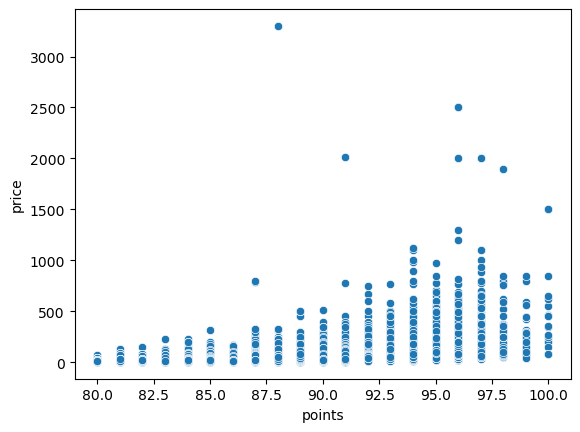

In [22]:
# Create the scatter plot
sns.scatterplot(data=reviews, x='points', y='price')
plt.show()

In [74]:
# Calculate the points-to-price ratio column
reviews['points_to_price_ratio'] = reviews['points'] / reviews['price']

# Sort the DataFrame by the points-to-price ratio column in descending order
sorted_reviews = reviews.sort_values('points_to_price_ratio', ascending=False)

# Select the title of the first wine in the sorted DataFrame
bargain_wine = sorted_reviews.iloc[0]['title']
bargain_wine

'Bandit NV Merlot (California)'

## 6.
There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a Series `descriptor_counts` counting how many times each of these two words appears in the `description` column in the dataset. (For simplicity, let's ignore the capitalized versions of these words.)

In [64]:
tropical = reviews['description'].str.contains('tropical').sum()
fruity = reviews['description'].str.contains('fruity').sum()

descriptor_counts = pd.Series({'Tropical:': tropical, 'Fruity:': fruity})
print(descriptor_counts)

Tropical:    3607
Fruity:      9090
dtype: int64


## 7.
We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

Create a series `star_ratings` with the number of stars corresponding to each review in the dataset.

In [70]:
def rating(row):
    if row['country'] == 'Canada':
        return 3
    elif row['points'] >= 95:
        return 3
    elif row['points'] >= 85:
        return 2
    else:
        return 1

star_ratings =  reviews.apply(rating, axis='columns')
print(star_ratings)

0         2
1         2
2         2
3         2
4         2
         ..
129966    2
129967    2
129968    2
129969    2
129970    2
Length: 129971, dtype: int64


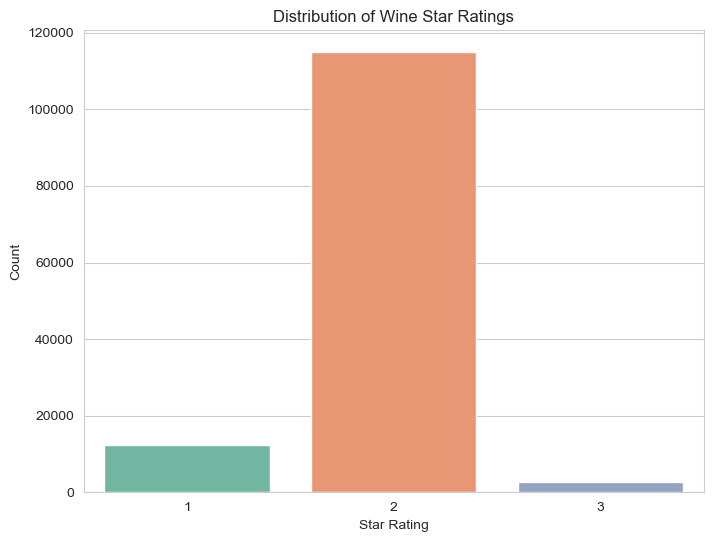

In [73]:
# create a countplot to visualize the distribution of star ratings
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.countplot(x=star_ratings, palette='Set2')
plt.title('Distribution of Wine Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()